# <font color = "Green"> This notebook is a comprehensive program used for data preprocesssing and build models for Predicting EV Buying Intention

# <font color= "Indigo">Project Team:
<ol>
  <font color= "Indigo"><li>Gayathri Shanmugam</li>
  <li>Kayalvizhi Vellaichamy</li>
  <li>Nitya Malladi</li>
    <li>Saranya Anandan</li>
</ol>

### Context
The global auto manufacturing industry is undergoing rapid transformation by shifting focus from fuel-based vehicles to zero-emission vehicles (ZEVs). ZEVs are further categorized into battery electric vehicles and hydrogen fuel cell electric vehicles. In the United States, the federal government has mandated that at least 50% of the total cars sold should belong to the zero-emission category by the year 2030.
The scope of this project is to build a predictive model which classifies EV buyers in the United States based on their socio-demographic characteristics and their views on the current EV ecosystem. As per a recent survey, 53% of American vehicle users continue to prefer the traditional fuel-based vehicles over electric vehicles.This is a concerning issue for the government, auto companies and their dealers, and needs to be addressed by classifying an EV buyer from a non-buyer. Once the non-buyers are identified, focused strategies can be implemented to convert them into EV buyers

### Import required packages.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import statsmodels.api as sm


from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


## Loading dataset

In [2]:
# Create data frame for EV data set.
EV_intention_df = pd.read_csv('AfterMerge_Dataset.csv')

# Display the first 10 records of EV_intention_df data frame.
print(EV_intention_df.head(10))


   bichoice  range  home_chg  work_chg  town  highway  gender          state  \
0         0      1         3         1     3        2       0  Massachusetts   
1         0      4         3         3     4        2       0  Massachusetts   
2         0      2         5         0     2        4       0  Massachusetts   
3         0      4         5         0     1        1       0  Massachusetts   
4         0      1         5         0     1        2       0  Massachusetts   
5         0      3        20        10     2        4       0  Massachusetts   
6         1      3         1         1     3        2       0  Massachusetts   
7         0      1         3         3     4        2       0  Massachusetts   
8         0      1         3         5     4        1       0  Massachusetts   
9         0      2         5        20     3        4       0  Massachusetts   

   Region  education  ...  home_parking  home_evse  work_parking  work_evse  \
0       1          4  ...             3 

# Data preprocessing

### Understanding the shape of the dataset

In [3]:
# Determine dimensions of dataframe. 
print('Dimensions of dataframe:',EV_intention_df.shape )
# It has 5898 rows and 27 columns.

Dimensions of dataframe: (5898, 27)


In [4]:
EV_intention_df.duplicated().sum()


0

In [5]:
EV_intention_df.isna().sum()

bichoice        0
range           0
home_chg        0
work_chg        0
town            0
highway         0
gender          0
state           0
Region          0
education       0
employment      0
hsincome        0
hsize           0
housit          0
residence       0
all_cars        0
ev_cars         0
home_parking    0
home_evse       0
work_parking    0
work_evse       0
buycar          0
zipcode         0
dmileage        0
long_dist       0
Age_category    0
RUCA            0
dtype: int64

### Check the data types of the columns for the dataset.

In [6]:
# Display column data types in the dataframe
print('Datatypes of all the columns in the dataset')
print(EV_intention_df.info())
EV_intention_df.describe().T

Datatypes of all the columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bichoice      5898 non-null   int64 
 1   range         5898 non-null   int64 
 2   home_chg      5898 non-null   int64 
 3   work_chg      5898 non-null   int64 
 4   town          5898 non-null   int64 
 5   highway       5898 non-null   int64 
 6   gender        5898 non-null   int64 
 7   state         5898 non-null   object
 8   Region        5898 non-null   int64 
 9   education     5898 non-null   int64 
 10  employment    5898 non-null   int64 
 11  hsincome      5898 non-null   int64 
 12  hsize         5898 non-null   int64 
 13  housit        5898 non-null   int64 
 14  residence     5898 non-null   int64 
 15  all_cars      5898 non-null   int64 
 16  ev_cars       5898 non-null   int64 
 17  home_parking  5898 non-null   int64 
 18  home

,count,mean,std,min,25%,50%,75%,max
bichoice,5898.0,0.550017,0.497534,0.0,0.0,1.0,1.0,1.0
range,5898.0,2.507460,1.112326,1.0,2.0,3.0,3.0,4.0
home_chg,5898.0,5.943371,6.602592,0.0,1.0,3.0,10.0,20.0
work_chg,5898.0,5.899627,6.574685,0.0,1.0,3.0,10.0,20.0
town,5898.0,2.504408,1.124472,1.0,1.0,3.0,4.0,4.0
highway,5898.0,2.502204,1.115089,1.0,2.0,2.0,3.0,4.0
gender,5898.0,0.503561,0.500030,0.0,0.0,1.0,1.0,1.0
Region,5898.0,2.899288,1.367156,1.0,2.0,3.0,4.0,5.0
education,5898.0,2.703967,0.839617,1.0,2.0,3.0,3.0,4.0
employment,5898.0,1.659207,1.291301,1.0,1.0,1.0,2.0,6.0


- There are no null values
- All columns are integer type except state which is of object datatype
- Some of the attributes need the conversion into their equivalent dummy values

In [7]:
# Display column data types in the dataframe before modification
print('Original Column data types')
print(EV_intention_df.dtypes)

Original Column data types
bichoice         int64
range            int64
home_chg         int64
work_chg         int64
town             int64
highway          int64
gender           int64
state           object
Region           int64
education        int64
employment       int64
hsincome         int64
hsize            int64
housit           int64
residence        int64
all_cars         int64
ev_cars          int64
home_parking     int64
home_evse        int64
work_parking     int64
work_evse        int64
buycar           int64
zipcode          int64
dmileage         int64
long_dist        int64
Age_category     int64
RUCA             int64
dtype: object


In [8]:
# Need to change all the variables with multiple classes to 'category'datatype 
EV_intention_df.gender = EV_intention_df.gender.astype('category')
EV_intention_df.state = EV_intention_df.state.astype('category')
EV_intention_df.employment = EV_intention_df.employment.astype('category')
EV_intention_df.hsize = EV_intention_df.hsize.astype('category')
EV_intention_df.housit = EV_intention_df.housit.astype('category')
EV_intention_df.residence = EV_intention_df.residence.astype('category')
#EV_intention_df.zipcode = EV_intention_df.zipcode.astype('category')
EV_intention_df.buycar = EV_intention_df.buycar.astype('category')
EV_intention_df.home_evse = EV_intention_df.home_evse.astype('category')
EV_intention_df.work_evse = EV_intention_df.work_evse.astype('category')
EV_intention_df.town = EV_intention_df.town.astype('category')
EV_intention_df.highway = EV_intention_df.highway.astype('category')
EV_intention_df.home_parking = EV_intention_df.home_parking.astype('category')
EV_intention_df.work_parking = EV_intention_df.work_parking.astype('category')
EV_intention_df.RUCA = EV_intention_df.RUCA.astype('category')
EV_intention_df.Region = EV_intention_df.Region.astype('category')
EV_intention_df.Age_category = EV_intention_df.Age_category.astype('category')
EV_intention_df.education = EV_intention_df.education.astype('category')
EV_intention_df.hsincome = EV_intention_df.hsincome.astype('category')
EV_intention_df.range = EV_intention_df.range.astype('category')
EV_intention_df.bichoice = EV_intention_df.bichoice.astype('category')

# Display category levels (attributes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(EV_intention_df.gender.cat.categories)
print(EV_intention_df.gender.dtype)
print(EV_intention_df.state.cat.categories)
print(EV_intention_df.state.dtype)
print(EV_intention_df.employment.cat.categories)
print(EV_intention_df.employment.dtype)
print(EV_intention_df.hsize.cat.categories)
print(EV_intention_df.hsize.dtype)
print(EV_intention_df.housit.cat.categories)
print(EV_intention_df.housit.dtype)
print(EV_intention_df.residence.cat.categories)
print(EV_intention_df.residence.dtype)
print(EV_intention_df.bichoice.cat.categories)
print(EV_intention_df.bichoice.dtype)
# print(EV_intention_df.zipcode.cat.categories)
# print(EV_intention_df.zipcode.dtype)
print(EV_intention_df.buycar.cat.categories)
print(EV_intention_df.buycar.dtype)
print(EV_intention_df.home_evse.cat.categories)
print(EV_intention_df.home_evse.dtype)
print(EV_intention_df.work_evse.cat.categories)
print(EV_intention_df.work_evse.dtype)
print(EV_intention_df.town.cat.categories)
print(EV_intention_df.town.dtype)
print(EV_intention_df.highway.cat.categories)
print(EV_intention_df.highway.dtype)
print(EV_intention_df.home_parking.cat.categories)
print(EV_intention_df.home_parking.dtype)
print(EV_intention_df.work_parking.cat.categories)
print(EV_intention_df.work_parking.dtype)
print(EV_intention_df.RUCA.cat.categories)
print(EV_intention_df.RUCA.dtype)
print(EV_intention_df.Region.cat.categories)
print(EV_intention_df.Region.dtype)
print(EV_intention_df.Age_category.cat.categories)
print(EV_intention_df.Age_category.dtype)
print(EV_intention_df.education.cat.categories)
print(EV_intention_df.education.dtype)
print(EV_intention_df.hsincome.cat.categories)
print(EV_intention_df.hsincome.dtype)
print(EV_intention_df.range.cat.categories)
print(EV_intention_df.range.dtype)
print(EV_intention_df.bichoice.cat.categories)
print(EV_intention_df.bichoice.dtype)

 
Category levels and changed variable type:
Int64Index([0, 1], dtype='int64')
category
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')
category
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5], dtype='int64')
category
Int64Index([1, 2, 3, 4], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5, 6, 8], dtype='int64')

In [9]:
ordinal_encoded_columns= ['state']

ordinal_encoder = OrdinalEncoder(categories='auto')
ordinal_encoded_data = ordinal_encoder.fit_transform(EV_intention_df[ordinal_encoded_columns])

#Convert it to df
ordinal_encoded_data_df = pd.DataFrame(ordinal_encoded_data, index=EV_intention_df.index,columns=['state'])
# # ordinal_encoded_data_df.columns = ordinal_encoder.get_feature_names_out(input_features=EV_intention_df[ordinal_encoded_columns])

# #Extract only the columns that didnt need to be encoded
data_other_cols = EV_intention_df.drop(columns=ordinal_encoded_columns)

# #Concatenate the two dataframes : 
EV_intention_df = pd.concat([ordinal_encoded_data_df, data_other_cols], axis=1)
print(EV_intention_df)
EV_intention_df.shape



      state bichoice range  home_chg  work_chg town highway gender Region  \
0      20.0        0     1         3         1    3       2      0      1   
1      20.0        0     4         3         3    4       2      0      1   
2      20.0        0     2         5         0    2       4      0      1   
3      20.0        0     4         5         0    1       1      0      1   
4      20.0        0     1         5         0    1       2      0      1   
...     ...      ...   ...       ...       ...  ...     ...    ...    ...   
5893    1.0        0     2        10         5    2       2      0      5   
5894    1.0        1     3         1         3    4       3      0      5   
5895    1.0        0     1        20         2    2       4      0      5   
5896    1.0        0     2        20         5    4       2      0      5   
5897    1.0        0     1         2         1    3       1      0      5   

     education  ... home_parking home_evse work_parking work_evse buycar  \

(5898, 27)

In [10]:
EV_intention_df.state = EV_intention_df.state.astype('category')


In [11]:
# Display column data types in the dataframe after modification
print('Modified Column data types')
print(EV_intention_df.dtypes)

Modified Column data types
state           category
bichoice        category
range           category
home_chg           int64
work_chg           int64
town            category
highway         category
gender          category
Region          category
education       category
employment      category
hsincome        category
hsize           category
housit          category
residence       category
all_cars           int64
ev_cars            int64
home_parking    category
home_evse       category
work_parking    category
work_evse       category
buycar          category
zipcode            int64
dmileage           int64
long_dist          int64
Age_category    category
RUCA            category
dtype: object


### Data summary

In [12]:
# Use describe() function to display column statistics for the entire data set. 
np.round(EV_intention_df.describe(), decimals=2).T

,count,mean,std,min,25%,50%,75%,max
home_chg,5898.0,5.94,6.60,0.0,1.0,3.0,10.0,20.0
work_chg,5898.0,5.90,6.57,0.0,1.0,3.0,10.0,20.0
all_cars,5898.0,1.58,0.72,1.0,1.0,1.0,2.0,4.0
ev_cars,5898.0,0.08,0.30,0.0,0.0,0.0,0.0,4.0
zipcode,5898.0,52330.80,29095.13,1247.0,29483.0,48073.0,78258.0,99703.0
dmileage,5898.0,24.75,20.35,0.0,10.0,20.0,30.0,100.0
long_dist,5898.0,1.49,1.32,0.0,0.0,1.0,2.0,4.0


### Observation


In [13]:
#Develop predictors X and output variable Y for the data set.
X = EV_intention_df.drop(columns=['bichoice','zipcode'])
y = EV_intention_df['bichoice']

# Develop training (60%) and validation(40% or 0.4) partitions for
# heart_disease_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)

Training :  (4128, 25)
Validation :  (1770, 25)


In [14]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier

In [15]:
print('Predictors list')
print(X.columns)

Predictors list
Index(['state', 'range', 'home_chg', 'work_chg', 'town', 'highway', 'gender',
       'Region', 'education', 'employment', 'hsincome', 'hsize', 'housit',
       'residence', 'all_cars', 'ev_cars', 'home_parking', 'home_evse',
       'work_parking', 'work_evse', 'buycar', 'dmileage', 'long_dist',
       'Age_category', 'RUCA'],
      dtype='object')


In [17]:
scaler = StandardScaler()

In [18]:
# Note the use of an array of column names.
scaler.fit(X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']])  


StandardScaler()

In [20]:
# Transform the full data set into standardized (normalized) data set. 
#train_X.reset_index(drop=True,inplace=True)
train_X = pd.concat([pd.DataFrame(scaler.transform(train_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=train_X.index),
                       train_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(train_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
5495  0.783612  1.341933  -0.142891  -0.136844  0.440770  1.343321 -1.007147   
2146 -1.078659  1.341933   0.614452  -0.593178 -1.337993  1.343321  0.992904   
1893 -1.078659  1.341933  -0.597297   2.144828 -0.448612 -1.347275  0.992904   
4741 -1.492498  0.442839   0.614452  -0.441066 -1.337993 -0.450409 -1.007147   
1686 -1.078659 -0.456254   0.614452  -0.136844 -0.448612 -0.450409  0.992904   
...        ...       ...        ...        ...       ...       ...       ...   
905   1.404369 -1.355348  -0.597297   2.144828 -0.448612  1.343321 -1.007147   
5192 -1.354552  0.442839   0.614452  -0.136844  1.330152  1.343321  0.992904   
3980 -0.457902 -1.355348  -0.142891  -0.136844 -1.337993  0.446456 -1.007147   
235   1.335396 -0.456254   2.129137  -0.136844  1.330152 -0.450409  0.992904   
5157 -1.354552  0.442839  -0.445828  -0.897401 -0.448612 -1.3

In [21]:
# Transform the full data set into standardized (normalized) data set. 
#valid_X.reset_index(drop=True,inplace=True)
valid_X = pd.concat([pd.DataFrame(scaler.transform(valid_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=valid_X.index),
                       valid_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(valid_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
573   0.852585 -0.456254  -0.900234  -0.441066 -0.448612 -1.347275 -1.007147   
3219  1.611288  0.442839   2.129137  -0.745289 -0.448612  0.446456 -1.007147   
4436  1.197450 -1.355348   2.129137  -0.593178  0.440770 -0.450409  0.992904   
3887  0.162855  0.442839   0.614452   2.144828 -0.448612 -0.450409 -1.007147   
3656  0.024909  1.341933  -0.142891   0.623714  0.440770 -0.450409 -1.007147   
...        ...       ...        ...        ...       ...       ...       ...   
3321 -0.113037 -0.456254  -0.597297  -0.136844  1.330152 -1.347275 -1.007147   
2105 -1.078659 -0.456254  -0.445828  -0.745289 -0.448612  1.343321  0.992904   
710   0.852585  1.341933  -0.597297   2.144828 -0.448612 -1.347275 -1.007147   
4302  1.197450  1.341933  -0.597297  -0.136844  0.440770 -1.347275  0.992904   
3201  1.611288  0.442839  -0.597297   0.623714 -0.448612 -0.4

In [22]:
train_X_s = train_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(train_X_s)

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
5495  0.783612  1.341933  -0.142891  -0.136844  0.440770  1.343321 -1.007147   
2146 -1.078659  1.341933   0.614452  -0.593178 -1.337993  1.343321  0.992904   
1893 -1.078659  1.341933  -0.597297   2.144828 -0.448612 -1.347275  0.992904   
4741 -1.492498  0.442839   0.614452  -0.441066 -1.337993 -0.450409 -1.007147   
1686 -1.078659 -0.456254   0.614452  -0.136844 -0.448612 -0.450409  0.992904   
...        ...       ...        ...        ...       ...       ...       ...   
905   1.404369 -1.355348  -0.597297   2.144828 -0.448612  1.343321 -1.007147   
5192 -1.354552  0.442839   0.614452  -0.136844  1.330152  1.343321  0.992904   
3980 -0.457902 -1.355348  -0.142891  -0.136844 -1.337993  0.446456 -1.007147   
235   1.335396 -0.456254   2.129137  -0.136844  1.330152 -0.450409  0.992904   
5157 -1.354552  0.442839  -0.445828  -0.897401 -0.448612 -1.347275  0.992904   

       zRegion  zeducation  zemployment

In [23]:
valid_X_s = valid_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(valid_X_s)

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
573   0.852585 -0.456254  -0.900234  -0.441066 -0.448612 -1.347275 -1.007147   
3219  1.611288  0.442839   2.129137  -0.745289 -0.448612  0.446456 -1.007147   
4436  1.197450 -1.355348   2.129137  -0.593178  0.440770 -0.450409  0.992904   
3887  0.162855  0.442839   0.614452   2.144828 -0.448612 -0.450409 -1.007147   
3656  0.024909  1.341933  -0.142891   0.623714  0.440770 -0.450409 -1.007147   
...        ...       ...        ...        ...       ...       ...       ...   
3321 -0.113037 -0.456254  -0.597297  -0.136844  1.330152 -1.347275 -1.007147   
2105 -1.078659 -0.456254  -0.445828  -0.745289 -0.448612  1.343321  0.992904   
710   0.852585  1.341933  -0.597297   2.144828 -0.448612 -1.347275 -1.007147   
4302  1.197450  1.341933  -0.597297  -0.136844  0.440770 -1.347275  0.992904   
3201  1.611288  0.442839  -0.597297   0.623714 -0.448612 -0.450409 -1.007147   

       zRegion  zeducation  zemployment

In [35]:
# Transform the full data set into standardized (normalized) data set. 
#train_X.reset_index(drop=True,inplace=True)
full_X = pd.concat([pd.DataFrame(scaler.transform(X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=X.index),
                       X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(full_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
0    -0.250983 -1.355348  -0.445828  -0.745289  0.440770 -0.450409 -1.007147   
1    -0.250983  1.341933  -0.445828  -0.441066  1.330152 -0.450409 -1.007147   
2    -0.250983 -0.456254  -0.142891  -0.897401 -0.448612  1.343321 -1.007147   
3    -0.250983  1.341933  -0.142891  -0.897401 -1.337993 -1.347275 -1.007147   
4    -0.250983 -1.355348  -0.142891  -0.897401 -1.337993 -0.450409 -1.007147   
...        ...       ...        ...        ...       ...       ...       ...   
5893 -1.561471 -0.456254   0.614452  -0.136844 -0.448612 -0.450409 -1.007147   
5894 -1.561471  0.442839  -0.748765  -0.441066  1.330152  0.446456 -1.007147   
5895 -1.561471 -1.355348   2.129137  -0.593178 -0.448612  1.343321 -1.007147   
5896 -1.561471 -0.456254   2.129137  -0.136844  1.330152 -0.450409 -1.007147   
5897 -1.561471 -1.355348  -0.597297  -0.745289  0.440770 -1.3

In [36]:
full_X_s = full_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(full_X_s)

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
0    -0.250983 -1.355348  -0.445828  -0.745289  0.440770 -0.450409 -1.007147   
1    -0.250983  1.341933  -0.445828  -0.441066  1.330152 -0.450409 -1.007147   
2    -0.250983 -0.456254  -0.142891  -0.897401 -0.448612  1.343321 -1.007147   
3    -0.250983  1.341933  -0.142891  -0.897401 -1.337993 -1.347275 -1.007147   
4    -0.250983 -1.355348  -0.142891  -0.897401 -1.337993 -0.450409 -1.007147   
...        ...       ...        ...        ...       ...       ...       ...   
5893 -1.561471 -0.456254   0.614452  -0.136844 -0.448612 -0.450409 -1.007147   
5894 -1.561471  0.442839  -0.748765  -0.441066  1.330152  0.446456 -1.007147   
5895 -1.561471 -1.355348   2.129137  -0.593178 -0.448612  1.343321 -1.007147   
5896 -1.561471 -0.456254   2.129137  -0.136844  1.330152 -0.450409 -1.007147   
5897 -1.561471 -1.355348  -0.597297  -0.745289  0.440770 -1.347275 -1.007147   

       zRegion  zeducation  zemployment

In [23]:
# X = pd.DataFrame(train_X_s)
# y = EV_intention_df['bichoice']

In [24]:
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = XGBClassifier(n_estimators=500,
                      max_depth=6,
                      #eval_metric=mean_squared_error,
                      learning_rate = 0.05,
                      reg_alpha = 1,
                      reg_lambda = 5)
#model4 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=5)
model5 = LGBMClassifier()
model6 = LogisticRegression()

In [25]:
# Create the StackingRegressor with the base models as estimators
reg = StackingClassifier(
    estimators=[('rf', model1), ('gb', model2), ('xgb', model3),('lgbm', model5)],
    final_estimator=model6
)

In [26]:
reg.fit(train_X_s, train_y)

[15:44:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.05,
                                              max_delta_step=None, max_depth=6,
                                              min_child_weight=None,
                                        

In [ ]:
# score = reg.score(X_test, y_test)
# print(f"R^2 score: {score:.2f}")

In [28]:

print(f"\nStacking classifier training Accuracy: {reg.score(train_X_s, train_y):0.2f}")
print(f"Stacking classifier test Accuracy: {reg.score(valid_X_s, valid_y):0.2f}")


Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 0.74


In [29]:
pred_train = reg.predict(train_X_s)
pred_test =reg.predict(valid_X_s)


In [31]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, reg.predict(train_X_s))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, reg.predict(valid_X_s))
print(classification_report(valid_y, reg.predict(valid_X_s)))

Training Partition
Confusion Matrix (Accuracy 0.9988)

       Prediction
Actual    0    1
     0 1833    4
     1    1 2290

Validation Partition
Confusion Matrix (Accuracy 0.7435)

       Prediction
Actual   0   1
     0 545 272
     1 182 771
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       817
           1       0.74      0.81      0.77       953

    accuracy                           0.74      1770
   macro avg       0.74      0.74      0.74      1770
weighted avg       0.74      0.74      0.74      1770



## KFOLD CV- 10 fold

In [42]:
# evaluate a random forest model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model1, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.754 (0.008)


In [43]:
# evaluate a Gradient boosting model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model2, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.669 (0.012)


In [44]:
# evaluate a XGBClassifier model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model3, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.748 (0.013)


In [45]:
# evaluate a LGBM model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model5, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.739 (0.014)


In [46]:
# evaluate a Logistic regression model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model6, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.617 (0.020)


# 30 fold

In [50]:
# evaluate a random forest model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=30, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model1, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.763 (0.030)


In [51]:
# evaluate a gradient boosting model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=30, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model2, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.672 (0.040)


In [52]:
# evaluate a XGB Classifier model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=30, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model3, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.753 (0.032)


In [53]:
# evaluate a LGBM model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=30, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model5, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.742 (0.032)


In [54]:
# evaluate a logistic regression model using k-fold cross-validation

from sklearn.datasets import make_classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=30, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(model6, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.616 (0.038)


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[16:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

In [ ]:
#K-Fold CV (only)

Ideal: 0.626
> folds=2, accuracy=0.599 (0.594,0.604)
> folds=3, accuracy=0.588 (0.561,0.605)
> folds=4, accuracy=0.610 (0.592,0.628)
> folds=5, accuracy=0.601 (0.572,0.622)
> folds=6, accuracy=0.615 (0.607,0.623)
> folds=7, accuracy=0.612 (0.588,0.637)
> folds=8, accuracy=0.620 (0.585,0.636)
> folds=9, accuracy=0.620 (0.586,0.672)
> folds=10, accuracy=0.609 (0.568,0.642)
> folds=11, accuracy=0.619 (0.590,0.660)
> folds=12, accuracy=0.624 (0.597,0.648)
> folds=13, accuracy=0.626 (0.579,0.663)
> folds=14, accuracy=0.615 (0.582,0.694)
> folds=15, accuracy=0.631 (0.570,0.684)
> folds=16, accuracy=0.622 (0.580,0.663)
> folds=17, accuracy=0.627 (0.573,0.651)
> folds=18, accuracy=0.632 (0.595,0.680)
> folds=19, accuracy=0.624 (0.581,0.685)
> folds=20, accuracy=0.625 (0.573,0.698)
> folds=21, accuracy=0.622 (0.577,0.676)
> folds=22, accuracy=0.624 (0.582,0.698)
> folds=23, accuracy=0.623 (0.594,0.680)
> folds=24, accuracy=0.613 (0.565,0.667)
> folds=25, accuracy=0.623 (0.566,0.669)
> folds=26,

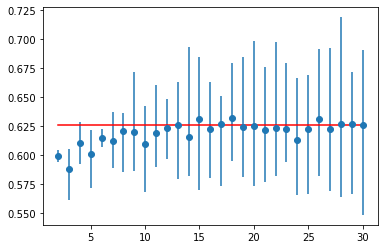

In [40]:
# # create the dataset
# def get_dataset(n_samples=100):
#     X = pd.DataFrame(train_X_s)
#     y = EV_intention_df['bichoice']
#     return X, y
 
# retrieve the model to be evaluate
def get_model():
    model = DecisionTreeClassifier()
    return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
 # get the dataset
   # X = pd.DataFrame(train_X_s)
    y = EV_intention_df['bichoice']
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [57]:
# # create the dataset
# def get_dataset(n_samples=100):
#     X = pd.DataFrame(train_X_s)
#     y = EV_intention_df['bichoice']
#     return X, y
 
# retrieve the model to be evaluate
def get_model():
    model = RandomForestClassifier()
    return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
 # get the dataset
    X = pd.DataFrame(train_X_s )
    y = EV_intention_df['bichoice']
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

KeyboardInterrupt: 

In [41]:
# # create the dataset
# def get_dataset(n_samples=100):
#     X = pd.DataFrame(train_X_s)
#     y = EV_intention_df['bichoice']
#     return X, y
 
# retrieve the model to be evaluate
def get_model():
    model = XGBClassifier()
    return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
 # get the dataset
    #X = pd.DataFrame(train_X_s)
    y = EV_intention_df['bichoice']
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, full_X_s, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

KeyboardInterrupt: 

Ideal: 0.742
> folds=2, accuracy=0.700 (0.691,0.709)
> folds=3, accuracy=0.719 (0.712,0.726)
> folds=4, accuracy=0.723 (0.711,0.731)
> folds=5, accuracy=0.728 (0.718,0.740)
> folds=6, accuracy=0.728 (0.702,0.750)
> folds=7, accuracy=0.735 (0.701,0.758)
> folds=8, accuracy=0.728 (0.703,0.761)
> folds=9, accuracy=0.739 (0.718,0.769)
> folds=10, accuracy=0.739 (0.722,0.766)
> folds=11, accuracy=0.737 (0.706,0.759)
> folds=12, accuracy=0.734 (0.697,0.768)
> folds=13, accuracy=0.737 (0.692,0.788)
> folds=14, accuracy=0.738 (0.697,0.791)
> folds=15, accuracy=0.738 (0.685,0.771)
> folds=16, accuracy=0.736 (0.704,0.775)
> folds=17, accuracy=0.734 (0.692,0.790)
> folds=18, accuracy=0.738 (0.683,0.787)
> folds=19, accuracy=0.742 (0.695,0.800)
> folds=20, accuracy=0.741 (0.692,0.800)
> folds=21, accuracy=0.743 (0.698,0.786)
> folds=22, accuracy=0.742 (0.694,0.791)
> folds=23, accuracy=0.741 (0.672,0.797)
> folds=24, accuracy=0.746 (0.687,0.812)
> folds=25, accuracy=0.741 (0.686,0.801)
> folds=26,

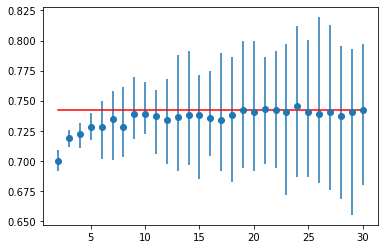

In [27]:
# # create the dataset
# def get_dataset(n_samples=100):
#     X = pd.DataFrame(train_X_s)
#     y = EV_intention_df['bichoice']
#     return X, y
 
# retrieve the model to be evaluate
def get_model():
    model = LGBMClassifier()
    return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
 # get the dataset
    X = pd.DataFrame(train_X_s)
    y = EV_intention_df['bichoice']
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [54]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# # create the dataset
# def get_dataset(n_samples=100):
#  X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
#  return X, y
 
# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
#  models.append(RidgeClassifier())
#  models.append(SGDClassifier())
#  models.append(PassiveAggressiveClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
#  models.append(ExtraTreeClassifier())
#  models.append(LinearSVC())
#  models.append(SVC())
#  models.append(GaussianNB())
#  models.append(AdaBoostClassifier())
#  models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(XGBClassifier())
    models.append(LGBMClassifier())
#     models.append(DecisionTreeClassifier())

#  models.append(ExtraTreesClassifier())
#  models.append(GaussianProcessClassifier())
#  models.append(GradientBoostingClassifier())
#  models.append(LinearDiscriminantAnalysis())
#  models.append(QuadraticDiscriminantAnalysis())
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
 # get the dataset
    X = pd.DataFrame(train_X_s)
    y = EV_intention_df['bichoice']
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
        # store results
        cv_results.append(cv_mean)
        ideal_results.append(ideal_mean)
        # summarize progress
        print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

Process LokyProcess-45:
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 483, in _process_worker
    gc.collect()
KeyboardInterrupt


KeyboardInterrupt: 